<a href="https://colab.research.google.com/github/CleideLustosa/Cleide-Lustosa/blob/main/A2_Search_Algorithms_Cleide_e_Erika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Search Algorithms**
---


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10409459, Cleide Lustosa de Oliveira da Silva' #@param {type:"string"}
Aluno2 = '10403716, Erika Borges Piaui' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo**

Nesta entrega, modelamos um grafo não direcionado do estado de São Paulo, ligando cidades paulistas às suas vizinhas. Os pesos das arestas representam as distâncias aproximadas entre as cidades (em km). O grafo foi construído no NetworkX e visualizado com os rótulos de custos nas arestas. Na entrega final, utilizaremos o algoritmo de Dijkstra para encontrar o caminho de menor custo entre cidades em um grafo ponderado (sem pesos negativos).

# **Implementação**

*Aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.*

> ***ATENÇÃO: O código deve ser 100% executável no Colab e, portanto, não devem ser empregados arquivos locais (da sua máquina) e, se necessário, devem ser incluídos o install de novas bibliotecas empregadas.***



## **1. Grafo das cidades (2,0)**

Importando as bibliotecas necessárias para a atividade:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Definição do grafo com cidades de São Paulo e suas vizinhas:

In [2]:
grafo_cidades_sp = {
    'São Paulo': ['Campinas', 'Santos', 'Sorocaba', 'São José dos Campos'],
    'Campinas': ['São Paulo', 'Sorocaba', 'Ribeirão Preto'],
    'Santos': ['São Paulo', 'Sorocaba'],
    'Sorocaba': ['São Paulo', 'Campinas', 'Bauru'],
    'São José dos Campos': ['São Paulo', 'Taubaté'],
    'Ribeirão Preto': ['Campinas', 'Bauru'],
    'Bauru': ['Sorocaba', 'Ribeirão Preto'],
    'Taubaté': ['São José dos Campos']
}

Definição dos pesos do grafo (distâncias aproximadas em km) das arestas:

In [3]:

distancias_km = {
    ('São Paulo','Campinas'): 99,
    ('São Paulo','Santos'): 75,
    ('São Paulo','Sorocaba'): 100,
    ('São Paulo','São José dos Campos'): 97,
    ('Campinas','Sorocaba'): 103,
    ('Campinas','Ribeirão Preto'): 220,
    ('Santos','Sorocaba'): 150,
    ('Sorocaba','Bauru'): 260,
    ('Ribeirão Preto','Bauru'): 180,
    ('São José dos Campos','Taubaté'): 45
}

Construindo o grafo (não direcionado) e adicionando as distâncias:

In [4]:
G = nx.Graph()
for cidade, vizinhos in grafo_cidades_sp.items():
    for v in vizinhos:
        w = distancias_km.get((cidade, v), distancias_km.get((v, cidade), None))
        if w is None:
            continue
        G.add_edge(cidade, v, weight=w)

Visualização do grafo:

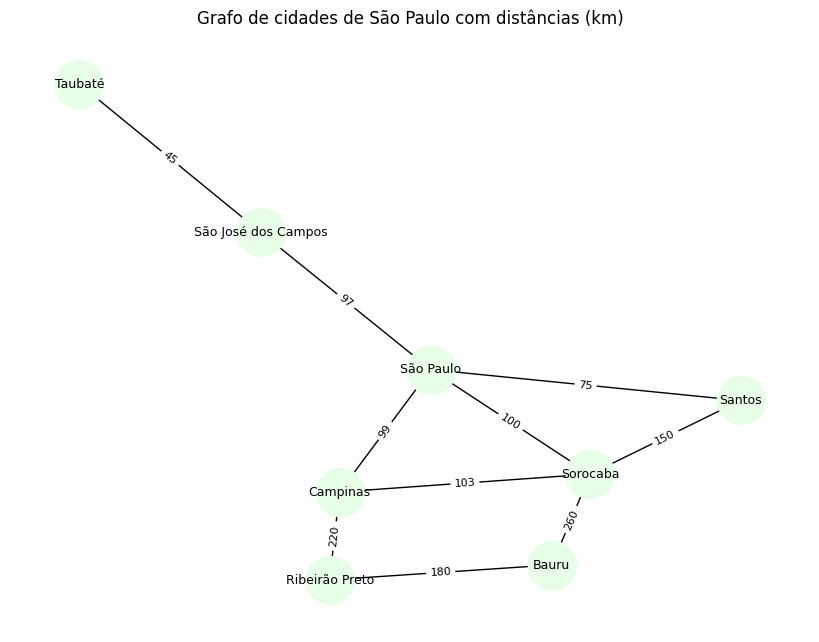

In [5]:
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, with_labels=True, node_size=1200, node_color='#e6ffe6', font_size=9)
rotulos = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=rotulos, font_size=8)
plt.title('Grafo de cidades de São Paulo com distâncias (km)')
plt.show()

> ## **1.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

Teste 1: Listar as cidades do grafo

In [6]:
print('Cidades no grafo SP:', ', '.join(sorted(list(G.nodes()))))

Cidades no grafo SP: Bauru, Campinas, Ribeirão Preto, Santos, Sorocaba, São José dos Campos, São Paulo, Taubaté


Teste 2: Consultando as distâncias

In [7]:
for (u, v), w in sorted(distancias_km.items()):
    print(f'{u} - {v}: {w} km')

Campinas - Ribeirão Preto: 220 km
Campinas - Sorocaba: 103 km
Ribeirão Preto - Bauru: 180 km
Santos - Sorocaba: 150 km
Sorocaba - Bauru: 260 km
São José dos Campos - Taubaté: 45 km
São Paulo - Campinas: 99 km
São Paulo - Santos: 75 km
São Paulo - Sorocaba: 100 km
São Paulo - São José dos Campos: 97 km


SINALIZAÇÃO DO ALGORITMO QUE SERÁ USADO PARA A ENTREGA FINAL (Dijkstra)

In [8]:
print('\nAlgoritmo informado para a próxima etapa: Dijkstra (menor caminho com pesos não negativos).')


Algoritmo informado para a próxima etapa: Dijkstra (menor caminho com pesos não negativos).


## **2. BFS, Breadth-First Search(2,0)**

In [9]:
from collections import deque

class No:
    def __init__(self, estado, pai=None):
        self.estado = estado
        self.pai = pai

    def caminho(self):
        no, caminho = self, []
        while no is not None:
            caminho.append(no.estado)
            no = no.pai
        return list(reversed(caminho))


class Grafo:
    def __init__(self, adjacencias):
        self.adjacencias = adjacencias

    def vizinhos(self, estado):
        return self.adjacencias.get(estado, [])


def busca_bfs(grafo, inicio, objetivo):
    raiz = No(inicio)
    fila = deque([raiz])
    visitados = set([inicio])

    print(f"Iniciando BFS de {inicio} até {objetivo}\n")

    while fila:
        no_atual = fila.popleft()
        print(f"Explorando: {no_atual.estado}")

        if no_atual.estado == objetivo:
            print("\nObjetivo encontrado!")
            return no_atual.caminho()

        for vizinho in grafo.vizinhos(no_atual.estado):
            if vizinho not in visitados:
                print(f"  - Adicionando vizinho: {vizinho}")
                visitados.add(vizinho)
                fila.append(No(vizinho, no_atual))

        print(f"Fila atual: {[n.estado for n in fila]}\n")

    print("Objetivo não encontrado.")
    return None


### Questão 2 - Busca em Largura (BFS) no grafo de cidades de São Paulo

Utilizamos para Busca em Largura (BFS), exploramos os vizinhos do nó inicial primeiro,
depois os vizinhos dos vizinhos, e assim sucessivamente.  
O algoritmo utilizando uma **fila (FIFO)** para garantir essa ordem.


> ## **2.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

Teste 1 - BFS no grafo de cidades de SP - São Paulo até Bauru

In [15]:
grafo = Grafo(grafo_cidades_sp)

print("Busca 1: São Paulo -> São José dos Campos\n")
caminho1 = busca_bfs(grafo, "São Paulo", "São José dos Campos")
print("Caminho encontrado:", caminho1)




Busca 1: São Paulo -> São José dos Campos

Iniciando BFS de São Paulo até São José dos Campos

Explorando: São Paulo
  - Adicionando vizinho: Campinas
  - Adicionando vizinho: Santos
  - Adicionando vizinho: Sorocaba
  - Adicionando vizinho: São José dos Campos
Fila atual: ['Campinas', 'Santos', 'Sorocaba', 'São José dos Campos']

Explorando: Campinas
  - Adicionando vizinho: Ribeirão Preto
Fila atual: ['Santos', 'Sorocaba', 'São José dos Campos', 'Ribeirão Preto']

Explorando: Santos
Fila atual: ['Sorocaba', 'São José dos Campos', 'Ribeirão Preto']

Explorando: Sorocaba
  - Adicionando vizinho: Bauru
Fila atual: ['São José dos Campos', 'Ribeirão Preto', 'Bauru']

Explorando: São José dos Campos

Objetivo encontrado!
Caminho encontrado: ['São Paulo', 'São José dos Campos']


Teste 2 - BFS no grafo de cidades de SP - São Paulo até Sorocaba

In [13]:
print("Busca 2: São Paulo -> Sorocaba\n")
caminho2 = busca_bfs(grafo, "São Paulo", "Sorocaba")
print("Caminho encontrado:", caminho2)

Busca 2: São Paulo -> Sorocaba

Iniciando BFS de São Paulo até Sorocaba

Explorando: São Paulo
  - Adicionando vizinho: Campinas
  - Adicionando vizinho: Santos
  - Adicionando vizinho: Sorocaba
  - Adicionando vizinho: São José dos Campos
Fila atual: ['Campinas', 'Santos', 'Sorocaba', 'São José dos Campos']

Explorando: Campinas
  - Adicionando vizinho: Ribeirão Preto
Fila atual: ['Santos', 'Sorocaba', 'São José dos Campos', 'Ribeirão Preto']

Explorando: Santos
Fila atual: ['Sorocaba', 'São José dos Campos', 'Ribeirão Preto']

Explorando: Sorocaba

Objetivo encontrado!
Caminho encontrado: ['São Paulo', 'Sorocaba']


## **3. Busca Informada (5,0)**

### Questão 3 - Busca Informada com o Algoritmo de Dijkstra

Escolhemos o algoritmo de **Dijkstra** porque ele encontra o menor caminho
em grafos com **pesos não negativos**, como é o caso das distâncias entre cidades.  

Iniciamos a distância do ponto de partida considerando 0, enquanto todos os outros começam com distância infinita, escolhemos o nó que tem a menor distância e que ainda não tinha sido visitado.

Em seguida verificamos os vizinhos desse nó e atualizamos as distâncias caso haja um caminho mais curto. Esse processo é refeito até que o destino seja final.

In [28]:
import heapq

class Grafo:
    def __init__(self, adjacencias, distancias):
        self.adjacencias = adjacencias
        self.distancias = distancias

    def vizinhos(self, estado):
        return self.adjacencias.get(estado, [])

    def peso(self, u, v):
        return self.distancias.get((u, v), self.distancias.get((v, u), None))

def dijkstra(grafo, inicio, objetivo):
    fila = [(0, inicio, [])]
    visitados = set()

    while fila:
        dist_atual, no_atual, caminho = heapq.heappop(fila)

        if no_atual in visitados:
            continue

        caminho = caminho + [no_atual]
        visitados.add(no_atual)

        if no_atual == objetivo:
            return dist_atual, caminho

        for vizinho in grafo.vizinhos(no_atual):
            if vizinho not in visitados:
                peso = grafo.peso(no_atual, vizinho)
                if peso is not None:
                    heapq.heappush(fila, (dist_atual + peso, vizinho, caminho))

    return float('inf'), []




Definição do Grafo e Distâncias

In [29]:
grafo_cidades_sp = {
    'São Paulo': ['Campinas', 'Santos', 'Sorocaba', 'São José dos Campos'],
    'Campinas': ['São Paulo', 'Sorocaba', 'Ribeirão Preto'],
    'Santos': ['São Paulo', 'Sorocaba'],
    'Sorocaba': ['São Paulo', 'Campinas', 'Bauru'],
    'São José dos Campos': ['São Paulo', 'Taubaté', 'Campos do Jordão'],
    'Ribeirão Preto': ['Campinas', 'Bauru'],
    'Bauru': ['Sorocaba', 'Ribeirão Preto'],
    'Taubaté': ['São José dos Campos'],
    'Campos do Jordão': ['São José dos Campos']
}

distancias_km = {
    ('São Paulo','Campinas'): 99,
    ('São Paulo','Santos'): 75,
    ('São Paulo','Sorocaba'): 100,
    ('São Paulo','São José dos Campos'): 97,
    ('Campinas','Sorocaba'): 103,
    ('Campinas','Ribeirão Preto'): 220,
    ('Santos','Sorocaba'): 150,
    ('Sorocaba','Bauru'): 260,
    ('Ribeirão Preto','Bauru'): 180,
    ('São José dos Campos','Taubaté'): 45,
    ('São José dos Campos','Campos do Jordão'): 70
}

grafo = Grafo(grafo_cidades_sp, distancias_km)


> ## **3.1. Resultados (Testes)**

*Um ou mais testes da solução devem ser apresentados ao final. Comente em células de texto explicativas os testes e os seus resultados.*

Teste 1 - São Paulo - CAmpos do Jordão

In [30]:
print("Teste 1: São Paulo -> Campos do Jordão\n")
distancia, caminho = dijkstra(grafo, "São Paulo", "Campos do Jordão")
print("Menor distância:", distancia, "km")
print("Caminho:", " -> ".join(caminho))


Teste 1: São Paulo -> Campos do Jordão

Menor distância: 167 km
Caminho: São Paulo -> São José dos Campos -> Campos do Jordão


Teste 2 - São Paulo - Sorocaba

In [31]:
print("\nTeste 2: São Paulo -> Sorocaba\n")
distancia, caminho = dijkstra(grafo, "São Paulo", "Sorocaba")
print("Menor distância:", distancia, "km")
print("Caminho:", " -> ".join(caminho))



Teste 2: São Paulo -> Sorocaba

Menor distância: 100 km
Caminho: São Paulo -> Sorocaba


Imagem Grafo da Cidade - TEste 1 e Teste 2

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for cidade, vizinhos in grafo_cidades_sp.items():
    for v in vizinhos:
        w = distancias_km.get((cidade, v), distancias_km.get((v, cidade), None))
        if w is not None:
            G.add_edge(cidade, v, weight=w)

def plot_grafo_com_caminho(G, caminho=None, titulo="Grafo de Cidades"):
    pos = nx.spring_layout(G, seed=7)
    plt.figure(figsize=(10,7))

    nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='#e6ffe6')

    nx.draw_networkx_edges(G, pos, width=2)

    nx.draw_networkx_labels(G, pos, font_size=10)

    rotulos = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=rotulos, font_size=8)

    if caminho:
        arestas_caminho = list(zip(caminho, caminho[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=arestas_caminho, width=4, edge_color='red')

    plt.title(titulo)
    plt.axis('off')
    plt.show()


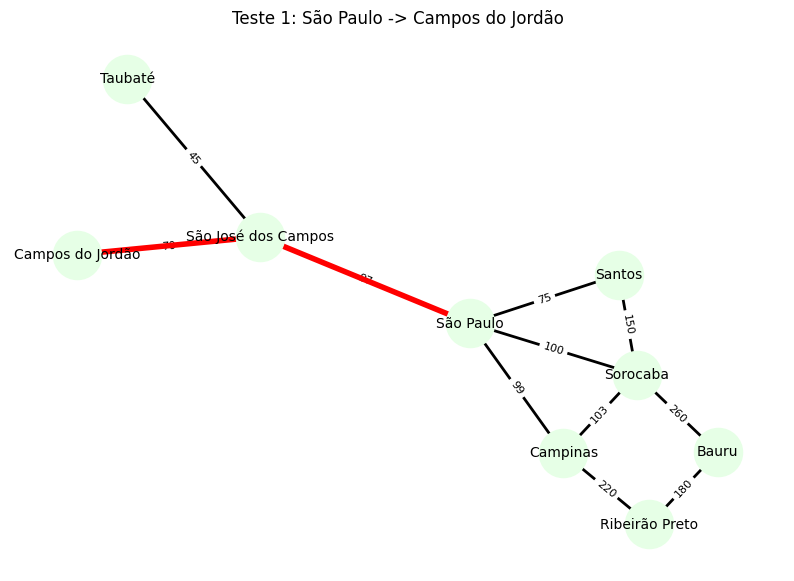

In [34]:
distancia, caminho = dijkstra(grafo, "São Paulo", "Campos do Jordão")
plot_grafo_com_caminho(G, caminho=caminho, titulo="Teste 1: São Paulo -> Campos do Jordão")


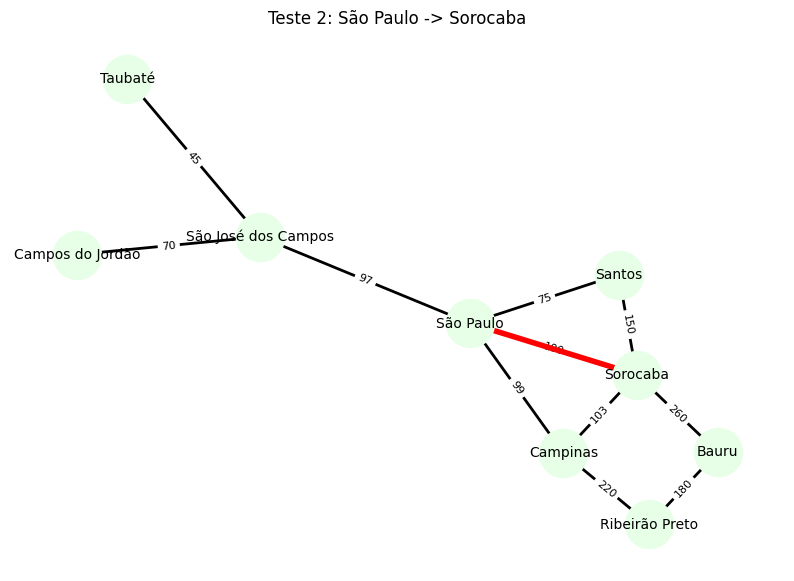

In [35]:
distancia, caminho = dijkstra(grafo, "São Paulo", "Sorocaba")
plot_grafo_com_caminho(G, caminho=caminho, titulo="Teste 2: São Paulo -> Sorocaba")


# **Referências**

Este é um item obrigatório. Inclua aqui o as referências, fontes, ou bibliografia e sites/bibliotecas empregadas em formato ABNT.

- ESTADOSECAPITAISDOBRASIL. Cidades de São Paulo. Disponível em: <https://www.estadosecapitaisdobrasil.com/cidades-de-sao-paulo/>. Acesso em: 3 set. 2025.

- Russell, S., Norvig, P., & Intelligence, A. (1995). A modern approach. Artificial Intelligence. Prentice-Hall, Egnlewood Cliffs, 25(27), 79-80. https://aima.cs.berkeley.edu/

- RUSSELL, Stuart; NORVIG, Peter. Artificial Intelligence: A Modern Approach. 4. ed. Pearson, 2020. ISBN 978-0134610993. 94-101. http://lib.ysu.am/disciplines_bk/efdd4d1d4c2087fe1cbe03d9ced67f34.pdf

---

In [39]:
#@title **Avaliação**
Resumo = 10 #@param {type:"slider", min:0, max:10, step:1}

Grafo = 9 #@param {type:"slider", min:0, max:10, step:1}

BFS = 6 #@param {type:"slider", min:0, max:10, step:1}

Busca_Informada = 8 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [40]:
#@title **Nota Final**

nota = Resumo + 2*Grafo + 3*BFS + 5*Busca_Informada + Referencias + Geral

nota = nota / 13

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.7


NameError: name 'Aluno1' is not defined